In [100]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
import folium

gps points taken from here: https://www.kaggle.com/datasets/nikitagrec/world-capitals-gps

In [101]:
df_path = '../dataset/immigrants_emigrants.ods'
df = pd.read_excel(df_path, engine = 'odf', index_col=0)
df.drop_duplicates('country', inplace=True)

In [102]:
df = df[df['country']!='Other countries'][['country', 'aerial_distance', 'angle', 'lat', 'lon']]

In [103]:
df.sort_values('angle', inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [105]:
AD_MAX = df['aerial_distance'].max()
AD_MIN = df['aerial_distance'].min()

# 'low' and 'high' refer to the final dot size.
def scale_to_interval(x, low=1, high=60):
    return ((x - AD_MIN) / (AD_MAX - AD_MIN)) * (high - low) + low

In [106]:
# vivid #E58606,#5D69B1,#52BCA3,#99C945,#CC61B0,#24796C,#DAA51B,#2F8AC4,#764E9F,#ED645A,#CC3A8E,#A5AA99
# https://carto.com/carto-colors/

# colors = "#E58606","#5D69B1","#52BCA3","#99C945","#CC61B0","#24796C","#DAA51B","#2F8AC4","#764E9F","#ED645A","#CC3A8E","#A5AA99","#88CCEE","#DDCC77","#117733","#332288"

# colors_dict = dict(zip(df['country'], colors))

colors_dict = {'Ukraine': '#E58606',
             'Moldova': '#5D69B1',
             'Greece': '#52BCA3',
             'Slovakia': '#99C945',
             'Romania': '#A5AA99',
             'Hungary': '#24796C',
             'Spain': '#DAA51B',
             'Israel': '#2F8AC4',
             'Italy': '#764E9F',
             'France': '#ED645A',
             'Canada': '#CC3A8E',
             'Australia': '#CC61B0',
             'Germany': '#88CCEE',
             'Austria': '#DDCC77',
             'Sweden': '#117733',
             'United States': '#332288',
             'Switzerland': '#661100',
             'Other countries': '#f97b72'}

In [107]:
# Different sHades of grey used in the plot
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

# Values for the x axis
angles = np.linspace(0, 2 * np.pi, len(df['country']), endpoint=False)

# Heights of the lines and y-position of the dot are given by the times.
heights = np.array(df['aerial_distance'])

# This is going to be helpful to create some space for labels within the circle 
# Don't worry if it doesn't make much sense yet, you're going to see it in action below
plus = 10

colors = [colors_dict[country] for country in df['country']]

In [108]:
# Create a data frame with the information for the four passwords that are going to be labeled
labels_df = df.reset_index()

labels_df["label"] = [
    f"{country}\naerial distance: {int(aerial_distance)} km" 
    for country, aerial_distance in zip(labels_df["country"], labels_df["aerial_distance"])
]

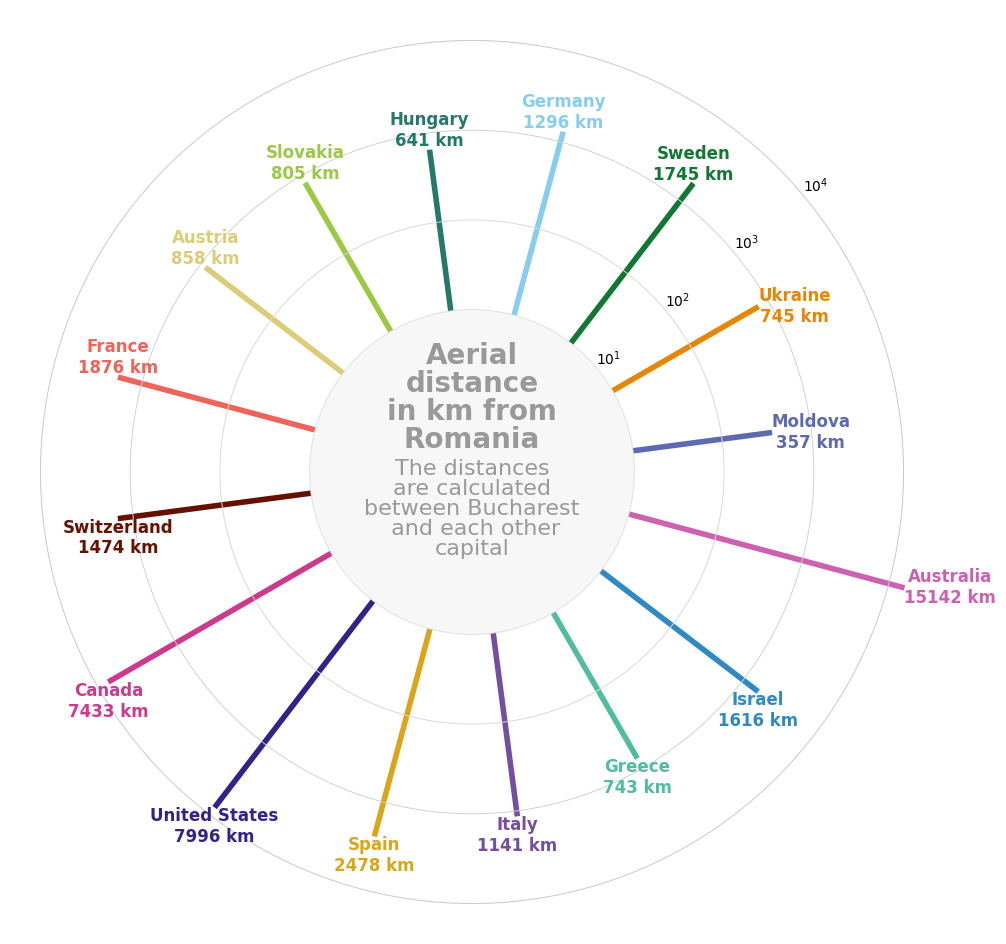

In [109]:
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Use logarithmic scale for the radial axis
ax.set_rscale('symlog')

# Angular axis starts at 90 degrees, not at 0
ax.set_theta_offset(np.pi/6)

# Reverse the direction to go counter-clockwise.
ax.set_theta_direction(-1)

# Add lines
ln2 = ax.vlines(angles, 0+plus, heights+plus, color=colors, lw=4)
# # Add dots
# ax.scatter(angles, heights+plus, s=heights,color=colors);

# Start by removing spines for both axes
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Remove grid lines, ticks, and tick labels.
ax.grid(False)
ax.set_xticks([])
ytick = ax.get_yticklabels()
ytick[0].set_visible(False)
# ax.set_yticklabels(ax.get_yticklabels()[1:])

# Add our custom grid lines for the radial axis.
# These lines indicate one day, one week, one month and one year.
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(plus, 200), color = GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(plus*10, 200), color= GREY85, lw=0.7)

ax.plot(HANGLES, np.repeat(plus*100, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(plus*1000, 200), color= GREY79, lw=0.7)
# Add labels for the four selected passwords, which are the most complicated
# passwords to crack.
for idx, row in df.iterrows():
    color = colors[idx]
    
    ha = 'center'
    va = 'top'
    
    if idx <= 2:
        ha = 'left'
        va = 'center'
    elif idx>=4 and idx < 10:
        ha = 'center'
        va = 'top'
#     elif idx<=6:
#         ha = 'center'
#         va = 'top'
#     elif idx<
    elif idx >= 10:
        ha = 'center'
        va = 'bottom'
    ax.text(
        x=angles[idx], y=row["aerial_distance"], s="{}\n{} km".format(row['country'], round(row['aerial_distance'])), color=color,
        ha=ha, va=va, ma="center", size=12, weight="bold"
    )
    
# If you have a look at the beginning of this post, you'll see the inner circle is not white.
# This fill creates the effect of a very light grey background.
ax.fill(HANGLES, np.repeat(plus, 200), GREY97)

# Note the 'transform=ax.transAxes'
# It allows us to pass 'x' and 'y' in terms of the (0, 1) coordinates of the axis
# instead of having to use the coordinates of the data.
# (0.5, 0.5) represents the middle of the axis in this transformed coordinate system
ax.text(
    x=0.5, y=0.58, s="Aerial\ndistance\nin km from\nRomania",
    color=GREY60, va="center", ha="center", ma="center",
    fontsize=20, fontweight="bold", linespacing=1, transform=ax.transAxes
)

ax.text(
    x=0.5, y=0.46, s="The distances\nare calculated\nbetween Bucharest\n and each other\ncapital",
    color=GREY60, va="center", ha="center",  ma="center",
    fontsize=16, linespacing=1, transform=ax.transAxes
)
ax.set_rlabel_position(350)

In [123]:
lollipop_fig = fig

In [113]:
# OUTER = "#ffffff"

# # Initialize layout in polar coordinates
# fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})

# # Set background color to white, both axis and figure.
# fig.patch.set_facecolor("white")
# ax.set_facecolor("white")

# # Use logarithmic scale for the radial axis
# ax.set_rscale('symlog')

# # Angular axis starts at 90 degrees, not at 0
# ax.set_theta_offset(np.pi/6)

# # Reverse the direction to go counter-clockwise.
# ax.set_theta_direction(-1)

# # Add lines
# ln2 = ax.vlines(angles, 0+plus, heights+plus, color=colors, lw=4)
# # # Add dots
# ax.scatter(angles, heights+plus, s=heights,color=colors);

# # Start by removing spines for both axes
# ax.spines["start"].set_color("none")
# ax.spines["polar"].set_color("none")

# # Remove grid lines, ticks, and tick labels.
# ax.grid(False)
# ax.set_xticks([])
# ytick = ax.get_yticklabels()
# ytick[0].set_visible(False)
# # ax.set_yticklabels(ax.get_yticklabels()[1:])

# # Add our custom grid lines for the radial axis.
# # These lines indicate one day, one week, one month and one year.
# HANGLES = np.linspace(0, 2 * np.pi, 200)
# # ax.plot(HANGLES, np.repeat(plus, 200), color = GREY88, lw=0.7)
# # ax.plot(HANGLES, np.repeat(plus*10, 200), color= GREY85, lw=0.7)

# # ax.plot(HANGLES, np.repeat(plus*100, 200), color= GREY82, lw=0.7)
# # ax.plot(HANGLES, np.repeat(plus*1000, 200), color= GREY79, lw=0.7)
# # ax.plot(HANGLES, np.repeat(plus*10000, 200), color= GREY79, lw=0.7)
# ax.plot(HANGLES, np.repeat(plus*100000, 200), color= OUTER, lw=0.7)
# # Add labels for the four selected passwords, which are the most complicated
# # passwords to crack.
# for idx, row in df.iterrows():
#     color = colors[idx]
    
#     ha = 'center'
#     va = 'top'
    
#     if idx <= 2:
#         ha = 'left'
#         va = 'center'
#     elif idx>=4 and idx < 10:
#         ha = 'center'
#         va = 'top'
# #     elif idx<=6:
# #         ha = 'center'
# #         va = 'top'
# #     elif idx<
#     elif idx >= 10:
#         ha = 'center'
#         va = 'bottom'
#     ax.text(
#         x=angles[idx], y=row["aerial_distance"], s="{}\n{} km".format(row['country'], round(row['aerial_distance'])), color=color,
#         ha=ha, va=va, ma="center", size=10, weight="bold"
#     )
    
# # If you have a look at the beginning of this post, you'll see the inner circle is not white.
# # This fill creates the effect of a very light grey background.
# ax.fill(HANGLES, np.repeat(plus, 200), GREY97)

# # Note the 'transform=ax.transAxes'
# # It allows us to pass 'x' and 'y' in terms of the (0, 1) coordinates of the axis
# # instead of having to use the coordinates of the data.
# # (0.5, 0.5) represents the middle of the axis in this transformed coordinate system
# ax.text(
#     x=0.5, y=0.58, s="Aerial\ndistance\nfrom Romania",
#     color=GREY60, va="center", ha="center", ma="center",
#     fontsize=14, fontweight="bold", linespacing=1, transform=ax.transAxes
# )

# ax.text(
#     x=0.5, y=0.46, s="The distances\nare calculated\nbetween Bucharest\n and each other\ncapital",
#     color=GREY60, va="center", ha="center",  ma="center",
#     fontsize=10, linespacing=1, transform=ax.transAxes
# )
# ax.set_rlabel_position(350)